# Pyspark_Clustering_Pipeline_FlightDelay

In [3]:
import numpy
import pandas

In [2]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

In [4]:
sc

<SparkContext master=yarn appName=pyspark-shell>

In [5]:
sc._conf.getAll()

[(u'spark.history.kerberos.keytab', u'none'),
 (u'spark.eventLog.enabled', u'true'),
 (u'spark.history.ui.port', u'18081'),
 (u'spark.driver.extraLibraryPath',
  u'/usr/hdp/current/hadoop-client/lib/native:/usr/hdp/current/hadoop-client/lib/native/Linux-amd64-64'),
 (u'spark.history.fs.cleaner.interval', u'7d'),
 (u'spark.shuffle.io.serverThreads', u'128'),
 (u'spark.yarn.historyServer.address',
  u'hdp-all-spark-new.c.kao-project-v1.internal:18081'),
 (u'spark.org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter.param.PROXY_HOSTS',
  u'hdp-all-spark-new.c.kao-project-v1.internal'),
 (u'spark.executor.extraLibraryPath',
  u'/usr/hdp/current/hadoop-client/lib/native:/usr/hdp/current/hadoop-client/lib/native/Linux-amd64-64'),
 (u'spark.driver.host', u'hdp-all-spark-new.c.kao-project-v1.internal'),
 (u'spark.sql.statistics.fallBackToHdfs', u'true'),
 (u'spark.shuffle.file.buffer', u'1m'),
 (u'spark.history.provider',
  u'org.apache.spark.deploy.history.FsHistoryProvider'),
 (u'spark

In [6]:
print sc.getConf().toDebugString()

spark.app.id=application_1541652388947_0027
spark.app.name=pyspark-shell
spark.driver.appUIAddress=http://hdp-all-spark-new.c.kao-project-v1.internal:4040
spark.driver.extraLibraryPath=/usr/hdp/current/hadoop-client/lib/native:/usr/hdp/current/hadoop-client/lib/native/Linux-amd64-64
spark.driver.host=hdp-all-spark-new.c.kao-project-v1.internal
spark.driver.port=36836
spark.eventLog.dir=hdfs:///spark2-history/
spark.eventLog.enabled=true
spark.executor.extraJavaOptions=-XX:+UseNUMA
spark.executor.extraLibraryPath=/usr/hdp/current/hadoop-client/lib/native:/usr/hdp/current/hadoop-client/lib/native/Linux-amd64-64
spark.executor.id=driver
spark.executorEnv.PYTHONPATH=/usr/hdp/3.0.0.0-1634/spark2/python:/usr/hdp/3.0.0.0-1634/spark2/python/lib/py4j-0.10.7-src.zip:<CPS>{{PWD}}/pyspark.zip<CPS>{{PWD}}/py4j-0.10.7-src.zip
spark.history.fs.cleaner.enabled=true
spark.history.fs.cleaner.interval=7d
spark.history.fs.cleaner.maxAge=90d
spark.history.fs.logDirectory=hdfs:///spark2-history/
spark.histo

In [7]:
from time import time

start_time = time()

In [8]:
from pyspark.sql import SparkSession

spark = (SparkSession
         .builder
         .appName("Pyspark_Clustering_Pipeline_FlightDelay")
         .getOrCreate())

print(spark)

In [9]:
#Run this cell if you want to read small FightDelay data
train_data = (spark
        .read
        .option("header","true")
        .option("inferSchema", "true")
        .csv("data/FlightDelay_2015_1.csv")
#         .csv("data/FlightDelay_Full_2015_01.csv")
#         .select("YEAR","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","UNIQUE_CARRIER","ORIGIN_AIRPORT_ID","ORIGIN_CITY_NAME","DEST_AIRPORT_ID","DEST_CITY_NAME","CRS_DEP_TIME","CRS_ARR_TIME","ARR_DELAY_NEW","ARR_DEL15","CANCELLED","DISTANCE")
)

train_data.cache()

DataFrame[YEAR: int, MONTH: int, DAY_OF_MONTH: int, DAY_OF_WEEK: int, UNIQUE_CARRIER: string, ORIGIN_AIRPORT_ID: int, ORIGIN_CITY_NAME: string, DEST_AIRPORT_ID: int, DEST_CITY_NAME: string, CRS_DEP_TIME: int, CRS_ARR_TIME: int, ARR_DELAY_NEW: int, ARR_DEL15: int, CANCELLED: int, DISTANCE: int]

In [10]:
train_data.show(5)

+----+-----+------------+-----------+--------------+-----------------+----------------+---------------+--------------+------------+------------+-------------+---------+---------+--------+
|YEAR|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|UNIQUE_CARRIER|ORIGIN_AIRPORT_ID|ORIGIN_CITY_NAME|DEST_AIRPORT_ID|DEST_CITY_NAME|CRS_DEP_TIME|CRS_ARR_TIME|ARR_DELAY_NEW|ARR_DEL15|CANCELLED|DISTANCE|
+----+-----+------------+-----------+--------------+-----------------+----------------+---------------+--------------+------------+------------+-------------+---------+---------+--------+
|2015|    1|          22|          4|            DL|            12953|    New York, NY|          13204|   Orlando, FL|        2050|        2354|           14|        0|        0|     950|
|2015|    1|          22|          4|            DL|            10397|     Atlanta, GA|          12953|  New York, NY|        1245|        1459|            0|        0|        0|     762|
|2015|    1|          22|          4|            DL|        

In [11]:
train_data.describe()

DataFrame[summary: string, YEAR: string, MONTH: string, DAY_OF_MONTH: string, DAY_OF_WEEK: string, UNIQUE_CARRIER: string, ORIGIN_AIRPORT_ID: string, ORIGIN_CITY_NAME: string, DEST_AIRPORT_ID: string, DEST_CITY_NAME: string, CRS_DEP_TIME: string, CRS_ARR_TIME: string, ARR_DELAY_NEW: string, ARR_DEL15: string, CANCELLED: string, DISTANCE: string]

In [12]:
train_data.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- ORIGIN_CITY_NAME: string (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- DEST_CITY_NAME: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_DELAY_NEW: integer (nullable = true)
 |-- ARR_DEL15: integer (nullable = true)
 |-- CANCELLED: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)



In [14]:
train_data.limit(5).toPandas()

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK UNIQUE_CARRIER  ORIGIN_AIRPORT_ID  \
0  2015      1            22            4             DL              12953   
1  2015      1            22            4             DL              10397   
2  2015      1            22            4             DL              14679   
3  2015      1            22            4             DL              10397   
4  2015      1            22            4             DL              10397   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DEST_CITY_NAME  CRS_DEP_TIME  \
0     New York, NY            13204    Orlando, FL          2050   
1      Atlanta, GA            12953   New York, NY          1245   
2    San Diego, CA            11433    Detroit, MI          1150   
3      Atlanta, GA            10208    Augusta, GA          1909   
4      Atlanta, GA            12266    Houston, TX          1342   

   CRS_ARR_TIME  ARR_DELAY_NEW  ARR_DEL15  CANCELLED  DISTANCE  
0          2354             14          0          0       950  
1          1459              0          0          0       762  
2          1914              0          0          0      1956  
3          2001              0          0          0       143  
4          1501              0          0          0       689

In [15]:
# from pyspark.sql.functions import sort
from pyspark.sql.functions import col

(train_data
.groupBy("YEAR","MONTH")
.count()
.sort(col("YEAR").asc(),col("MONTH").asc())
.toPandas())

YEAR  MONTH   count
0  2015      1  469968

In [16]:
train_data.sample(False, 0.00001, seed=12345).toPandas()

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK UNIQUE_CARRIER  ORIGIN_AIRPORT_ID  \
0  2015      1            21            3             MQ              11298   
1  2015      1             6            2             WN              14107   
2  2015      1            22            4             WN              10821   
3  2015      1             1            4             HA              12173   
4  2015      1            18            7             OO              13485   
5  2015      1             8            4             UA              12266   

        ORIGIN_CITY_NAME  DEST_AIRPORT_ID  DEST_CITY_NAME  CRS_DEP_TIME  \
0  Dallas/Fort Worth, TX            10372       Aspen, CO          1255   
1            Phoenix, AZ            11259      Dallas, TX          2000   
2          Baltimore, MD            13296  Manchester, NH          1035   
3           Honolulu, HI            13830     Kahului, HI          1157   
4            Madison, WI            13930     Chicago, IL           957   
5            Houston, TX            10721      Boston, MA          1910   

   CRS_ARR_TIME  ARR_DELAY_NEW  ARR_DEL15  CANCELLED  DISTANCE  
0          1407              0          0          0       701  
1          2310             33          1          0       879  
2          1150              0          0          0       377  
3          1236              8          0          0       100  
4          1056              0          0          0       108  
5          2349              0          0          0      1597

In [17]:
#Descibe Data
train_data.describe().toPandas()

summary    YEAR   MONTH        DAY_OF_MONTH         DAY_OF_WEEK  \
0   count  469968  469968              469968              469968   
1    mean  2015.0     1.0  15.853000629830117  4.0255591870084775   
2  stddev     0.0     0.0   8.952802554999723  1.9337717447978775   
3     min    2015       1                   1                   1   
4     max    2015       1                  31                   7   

  UNIQUE_CARRIER  ORIGIN_AIRPORT_ID ORIGIN_CITY_NAME     DEST_AIRPORT_ID  \
0         469968             469968           469968              469968   
1           None   12669.4042402887             None  12669.437148912266   
2           None  1516.976267060197             None  1516.8252187830892   
3             AA              10135     Aberdeen, SD               10135   
4             WN              16218         Yuma, AZ               16218   

  DEST_CITY_NAME        CRS_DEP_TIME        CRS_ARR_TIME      ARR_DELAY_NEW  \
0         469968              469968              469968             457013   
1           None  1323.5133924011848  1506.7239024784667  13.12414964125747   
2           None   468.1466531957545   483.5568919580219  35.77184217458076   
3   Aberdeen, SD                   5                   1                  0   
4       Yuma, AZ                2359                2359               1971   

             ARR_DEL15             CANCELLED           DISTANCE  
0               457013                469968             469968  
1   0.2099524521184299  0.025495352875089368  803.2612794913696  
2  0.40727482480224586   0.15762421363166454  596.2493830952534  
3                    0                     0                 31  
4                    1                     1               4983

In [18]:
#Find null variable 

train_data.groupBy('cancelled','arr_del15').count().toPandas()

cancelled  arr_del15   count
0          1        NaN   11982
1          0        0.0  361062
2          0        1.0   95951
3          0        NaN     973

In [19]:
#Filter null  
print("Before : " + str(train_data.count()))
train_data = train_data.filter((train_data['cancelled'] == 1) | ( train_data['arr_delay_new'].isNotNull()))
print("After filter null : " + str(train_data.count()))

Before : 469968
After filter null : 468995


In [20]:
#Extract Airport Information 1

transformed_data = (train_data
                    .groupBy('ORIGIN_AIRPORT_ID')
                    .agg({
                        "ORIGIN_AIRPORT_ID": "count",
                        "CANCELLED": "mean",
                        "DISTANCE": "mean"
                    }))
transformed_data.sample(False, 0.05, 1234).toPandas()

ORIGIN_AIRPORT_ID  avg(CANCELLED)  avg(DISTANCE)  count(ORIGIN_AIRPORT_ID)
0               11146        0.005682     556.863636                       176
1               10257        0.036972     755.830986                       568
2               12523        0.023256     427.259136                       301
3               10529        0.061456     840.995823                      1676
4               14709        0.025000     299.175000                        80
5               13433        0.023952     557.592814                       167
6               13931        0.032787     524.545667                       854
7               12266        0.010428     809.418005                     13330
8               11337        0.013245     299.821192                       151
9               11003        0.043675     415.915663                       664
10              11977        0.052055     245.610959                       365
11              11503        0.023490    1146.895973                       298
12              14674        0.109244     499.277311                       119
13              15376        0.009642     711.883609                      1452

In [21]:
#Extract Airport Information 2

transformed_data2 = (train_data
                    .filter(train_data['cancelled'] == 0)
                     .groupBy('ORIGIN_AIRPORT_ID')
                    .agg({
                        "ARR_DELAY_NEW": "mean",
                        "ARR_DEL15": "mean"
                    })
                    )
transformed_data2.sample(False, 0.05, 1234).toPandas()

ORIGIN_AIRPORT_ID  avg(ARR_DELAY_NEW)  avg(ARR_DEL15)
0               11146           19.908571        0.251429
1               10257           12.460695        0.180987
2               12523           12.615646        0.183673
3               10529           13.796567        0.205340
4               14709           14.282051        0.192308
5               13433           15.171779        0.196319
6               13931           10.993947        0.180387
7               12266           11.396103        0.202941
8               11337           15.778523        0.181208
9               11413           16.873626        0.269231
10              11977           17.534682        0.260116
11              11721           11.798408        0.167109
12              14674           23.792453        0.424528
13              15376            8.881085        0.142559

In [22]:
#Extract Airport Information 3

transformed_data3 = (train_data
                    .select('ORIGIN_AIRPORT_ID','UNIQUE_CARRIER')
                     .distinct()
                     .groupBy('ORIGIN_AIRPORT_ID')
                    .agg({
                        "UNIQUE_CARRIER": "count"
                    })
                    )
transformed_data3.sample(False, 0.05, 1234).toPandas()

ORIGIN_AIRPORT_ID  count(UNIQUE_CARRIER)
0               11146                      2
1               12264                      9
2               12523                      1
3               10529                      9
4               14709                      1
5               13433                      3
6               14635                      8
7               12266                      9
8               11337                      2
9               11003                      4
10              11977                      4
11              10372                      2
12              14674                      3
13              12402                      2

In [23]:
#Extract Airport Information - Merge
print(transformed_data.count)
merge_data = (transformed_data
              .join(transformed_data2, transformed_data['ORIGIN_AIRPORT_ID'] ==  transformed_data2['ORIGIN_AIRPORT_ID'], 'left')
              .drop(transformed_data2['ORIGIN_AIRPORT_ID'])
             )
merge_data = (merge_data
              .join(transformed_data3, merge_data['ORIGIN_AIRPORT_ID'] ==  transformed_data3['ORIGIN_AIRPORT_ID'], 'left')
              .drop(transformed_data3['ORIGIN_AIRPORT_ID'])
             )
merge_data.sample(False, 0.05, 1234).toPandas()

<bound method DataFrame.count of DataFrame[ORIGIN_AIRPORT_ID: int, avg(CANCELLED): double, avg(DISTANCE): double, count(ORIGIN_AIRPORT_ID): bigint]>


avg(CANCELLED)  avg(DISTANCE)  count(ORIGIN_AIRPORT_ID)  \
0         0.006452    1024.200000                       155   
1         0.096774    1053.500000                        62   
2         0.023256     427.259136                       301   
3         0.061456     840.995823                      1676   
4         0.025000     299.175000                        80   
5         0.023952     557.592814                       167   
6         0.032787     524.545667                       854   
7         0.010428     809.418005                     13330   
8         0.013245     299.821192                       151   
9         0.043675     415.915663                       664   
10        0.052055     245.610959                       365   
11        0.023490    1146.895973                       298   
12        0.109244     499.277311                       119   
13        0.009642     711.883609                      1452   

    ORIGIN_AIRPORT_ID  avg(ARR_DELAY_NEW)  avg(ARR_DEL15)  \
0               11630            8.935065        0.162338   
1               15070           17.678571        0.196429   
2               12523           12.615646        0.183673   
3               10529           13.796567        0.205340   
4               14709           14.282051        0.192308   
5               13433           15.171779        0.196319   
6               13931           10.993947        0.180387   
7               12266           11.396103        0.202941   
8               11337           15.778523        0.181208   
9               11003           24.825197        0.343307   
10              11977           17.534682        0.260116   
11              11503           22.233677        0.243986   
12              14674           23.792453        0.424528   
13              15376            8.881085        0.142559   

    count(UNIQUE_CARRIER)  
0                       1  
1                       1  
2                       1  
3                       9  
4                       1  
5                       3  
6                       7  
7                       9  
8                       2  
9                       4  
10                      4  
11                      3  
12                      3  
13                      7

In [24]:
merge_data.describe().toPandas()

summary        avg(CANCELLED)      avg(DISTANCE) count(ORIGIN_AIRPORT_ID)  \
0   count                   312                312                      312   
1    mean   0.03424272231136608  528.8169279196609       1503.1891025641025   
2  stddev  0.033007499957849684  367.3149409318587        3573.904900446728   
3     min                   0.0  56.08196721311475                        9   
4     max   0.18333333333333332             3801.0                    29460   

    ORIGIN_AIRPORT_ID   avg(ARR_DELAY_NEW)       avg(ARR_DEL15)  \
0                 312                  312                  312   
1  12699.179487179486   14.770060394000533   0.2077673088981846   
2  1629.6944458926553     6.35554696368576  0.07233894255923466   
3               10135  0.16666666666666666                  0.0   
4               16218    41.14754098360656                 0.44   

  count(UNIQUE_CARRIER)  
0                   312  
1     3.766025641025641  
2     3.259376714228784  
3                     1  
4                    13

In [26]:
#Fill na 

from pyspark.sql.functions import *

merge_data.select('avg(ARR_DELAY_NEW)').distinct().sort(asc('avg(ARR_DELAY_NEW)')).show(5)
merge_data = merge_data.fillna(0.0)
merge_data.select('avg(ARR_DELAY_NEW)').distinct().sort(asc('avg(ARR_DELAY_NEW)')).show(5)

+-------------------+
| avg(ARR_DELAY_NEW)|
+-------------------+
|0.16666666666666666|
| 0.4067796610169492|
| 0.6226415094339622|
| 1.9464285714285714|
| 3.5901639344262297|
+-------------------+
only showing top 5 rows

+-------------------+
| avg(ARR_DELAY_NEW)|
+-------------------+
|0.16666666666666666|
| 0.4067796610169492|
| 0.6226415094339622|
| 1.9464285714285714|
| 3.5901639344262297|
+-------------------+
only showing top 5 rows



In [27]:
#Create VectorAssembler

from pyspark.ml.feature import VectorAssembler

all_features = merge_data.drop('ORIGIN_AIRPORT_ID').columns
print(all_features)


assem =  VectorAssembler(inputCols = all_features ,outputCol="features")
print(assem)

['avg(CANCELLED)', 'avg(DISTANCE)', 'count(ORIGIN_AIRPORT_ID)', 'avg(ARR_DELAY_NEW)', 'avg(ARR_DEL15)', 'count(UNIQUE_CARRIER)']
VectorAssembler_44c6bc80e6e29a981a51


In [28]:
#Create Normalizer

from pyspark.ml.feature import MinMaxScaler

scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

print(scaler)

MinMaxScaler_4e98b24c9b27b26b85a2


In [29]:
#Create model

from pyspark.ml.clustering import KMeans

kmeans = KMeans(featuresCol="scaledFeatures", predictionCol="prediction",maxIter=1000, seed=50, k=3)
         
print(kmeans)

KMeans_4e10ba89935b15f90f58


In [30]:
#Set ML pipeline

from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[assem,scaler,kmeans])
 
print(pipeline)

Pipeline_40b6b645193c5cb6d269


In [31]:
#Train model

model = pipeline.fit(merge_data)

In [32]:
#Make predictions

predictions = model.transform(merge_data)
predictions.cache()

DataFrame[avg(CANCELLED): double, avg(DISTANCE): double, count(ORIGIN_AIRPORT_ID): bigint, ORIGIN_AIRPORT_ID: int, avg(ARR_DELAY_NEW): double, avg(ARR_DEL15): double, count(UNIQUE_CARRIER): bigint, features: vector, scaledFeatures: vector, prediction: int]

In [33]:
# Print sample result

predictions.sample(False, 0.03, 1234).toPandas()

avg(CANCELLED)  avg(DISTANCE)  count(ORIGIN_AIRPORT_ID)  ORIGIN_AIRPORT_ID  \
0        0.023952     557.592814                       167              13433   
1        0.010428     809.418005                     13330              12266   
2        0.031915     436.734043                       188              11413   
3        0.025840     609.010336                       387              11721   
4        0.009642     711.883609                      1452              15376   

   avg(ARR_DELAY_NEW)  avg(ARR_DEL15)  count(UNIQUE_CARRIER)  \
0           15.171779        0.196319                      3   
1           11.396103        0.202941                      9   
2           16.873626        0.269231                      3   
3           11.798408        0.167109                      5   
4            8.881085        0.142559                      7   

                                            features  \
0  [0.023952095808383235, 557.5928143712575, 167....   
1  [0.010427606901725431, 809.4180045011253, 1333...   
2  [0.031914893617021274, 436.7340425531915, 188....   
3  [0.025839793281653745, 609.0103359173127, 387....   
4  [0.009641873278236915, 711.883608815427, 1452....   

                                      scaledFeatures  prediction  
0  [0.13064779531845402, 0.13391771001859004, 0.0...           2  
1  [0.05687785582759326, 0.20116222322959484, 0.4...           1  
2  [0.17408123791102514, 0.10164496846324934, 0.0...           2  
3  [0.14094432699083861, 0.14764765580001785, 0.0...           2  
4  [0.05259203606311045, 0.1751177558122091, 0.04...           1

In [34]:
#Evaluate clustering by computing Within Set Sum of Squared Errors

kmean_model = model.stages[-1]
wssse = kmean_model.computeCost(predictions)
print("Within Set Sum of Squared Errors = " + str(wssse))

Within Set Sum of Squared Errors = 26.087722739


In [35]:
#Shows Cluster's Center

centers = kmean_model.clusterCenters()
scaler_model = model.stages[-2]
max = scaler_model.originalMax
min = scaler_model.originalMin
print("Cluster Centers: ")
for center in centers:
    print(center*(max-min) + min)

Cluster Centers: 
[8.09892909e-02 4.01353755e+02 1.70442308e+02 2.42631612e+01
 3.07313517e-01 1.88461538e+00]
[2.48871512e-02 8.15117129e+02 5.91843077e+03 1.27356699e+01
 1.98776970e-01 9.27692308e+00]
[2.48954944e-02 4.67373707e+02 3.86841026e+02 1.29166970e+01
 1.84218433e-01 2.43076923e+00]


In [36]:
#Shows Cluster's Center

center_pd = predictions.groupBy('prediction').agg({
    "avg(CANCELLED)": "mean",
    "avg(DISTANCE)": "mean",
    "count(ORIGIN_AIRPORT_ID)": "mean",
    "avg(ARR_DELAY_NEW)": "mean",
    "avg(ARR_DEL15)": "mean",
    "count(UNIQUE_CARRIER)": "mean",
}).toPandas()
center_pd

prediction  avg(avg(ARR_DELAY_NEW))  avg(count(UNIQUE_CARRIER))  \
0           1                12.735670                    9.276923   
1           2                12.916697                    2.430769   
2           0                24.263161                    1.884615   

   avg(avg(ARR_DEL15))  avg(count(ORIGIN_AIRPORT_ID))  avg(avg(CANCELLED))  \
0             0.198777                    5918.430769             0.024887   
1             0.184218                     386.841026             0.024895   
2             0.307314                     170.442308             0.080989   

   avg(avg(DISTANCE))  
0          815.117129  
1          467.373707  
2          401.353755

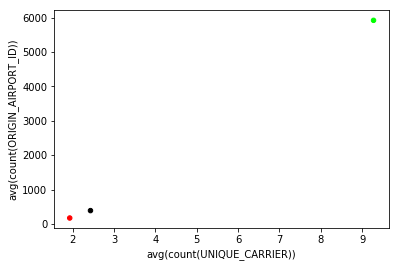

In [35]:
#Shows Cluster's Center

import numpy as np

%matplotlib inline
colormap = np.array(['red', 'lime', 'black'])
center_pd.plot(kind='scatter', x='avg(count(UNIQUE_CARRIER))', y='avg(count(ORIGIN_AIRPORT_ID))', c=colormap[center_pd.prediction])

In [37]:
train_cluster = predictions.select('prediction',*merge_data.columns)
train_cluster_pd = train_cluster.toPandas()

/opt/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


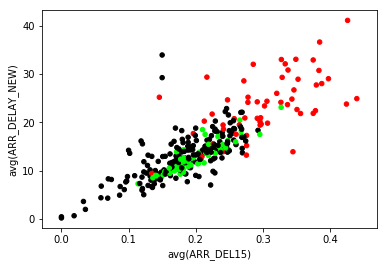

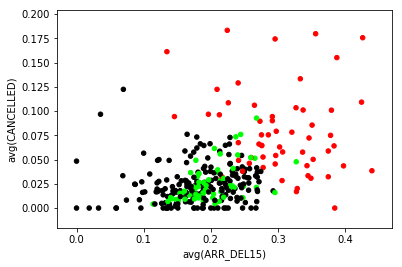

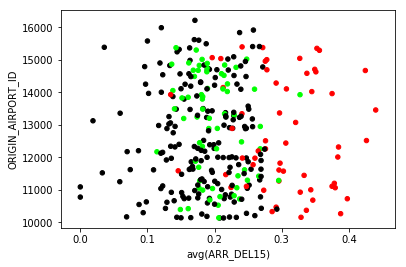

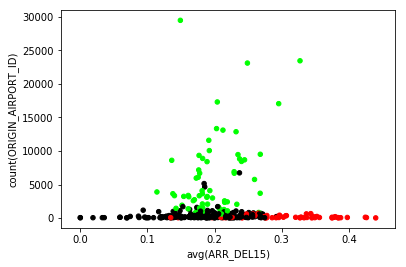

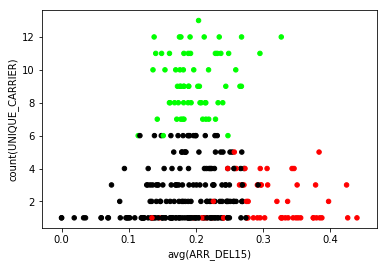

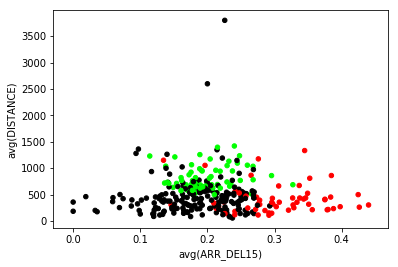

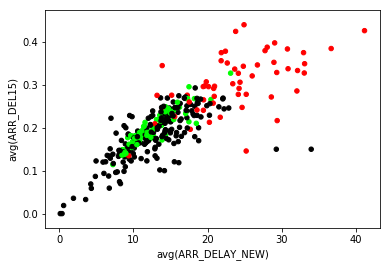

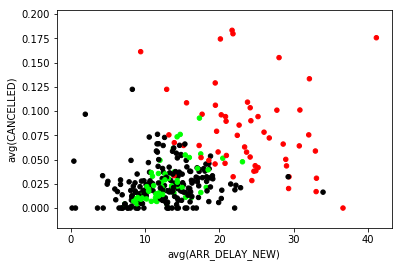

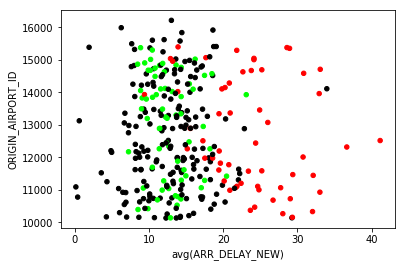

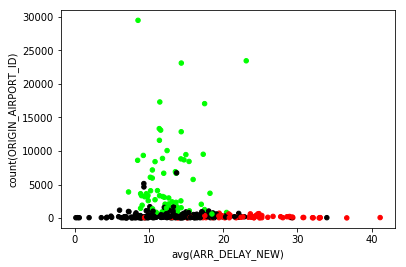

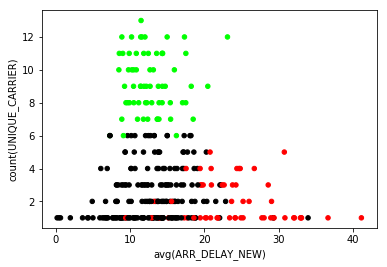

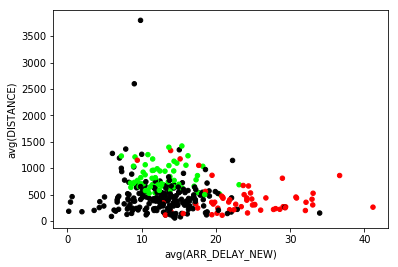

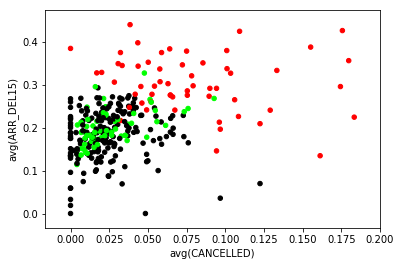

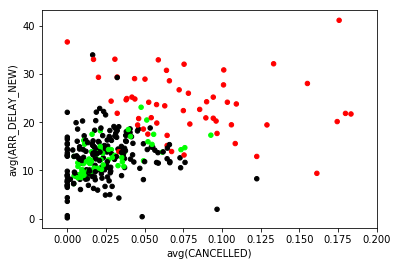

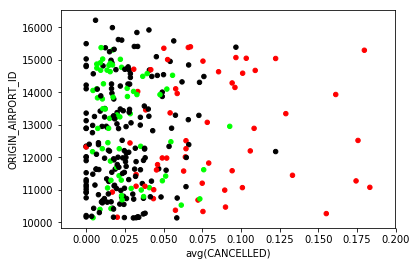

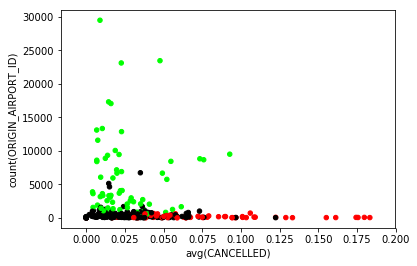

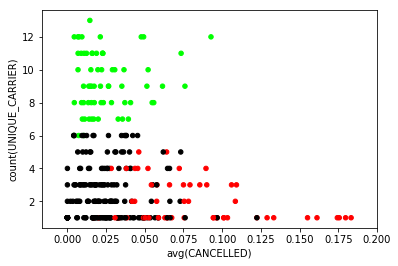

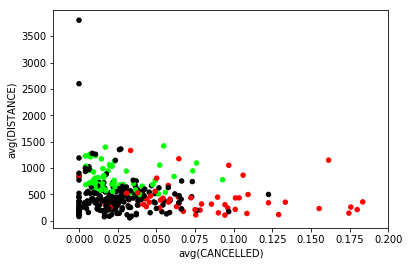

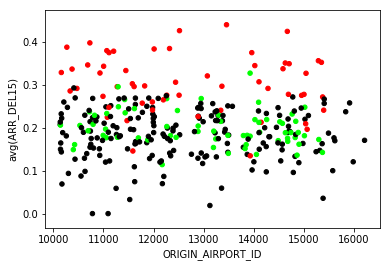

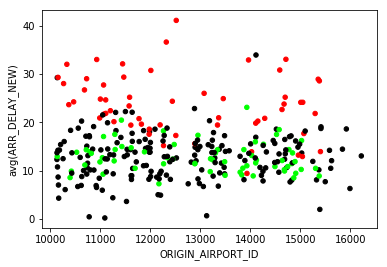

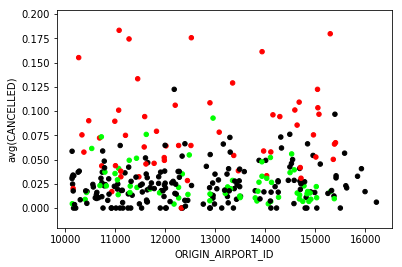

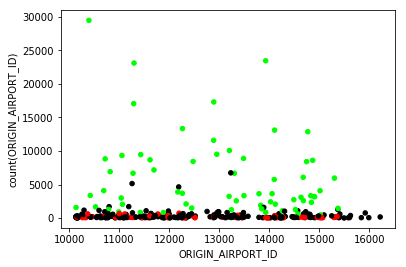

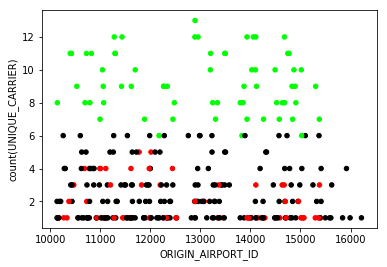

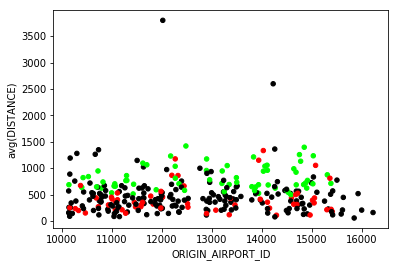

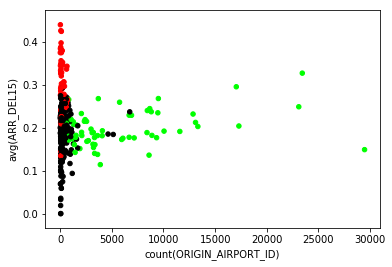

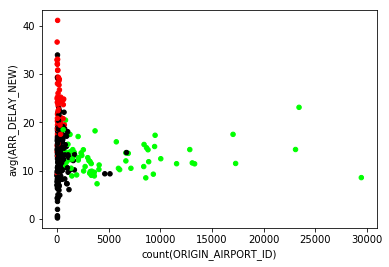

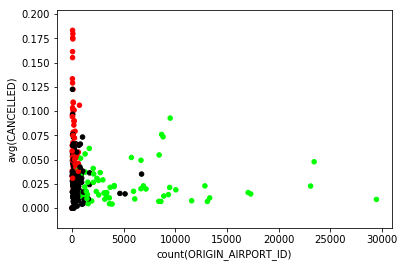

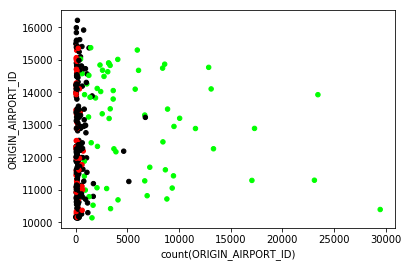

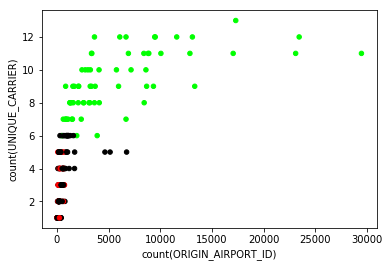

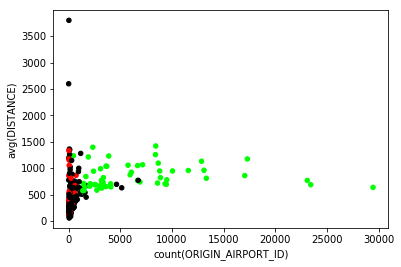

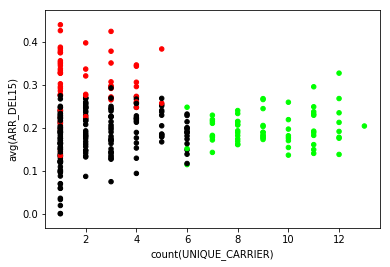

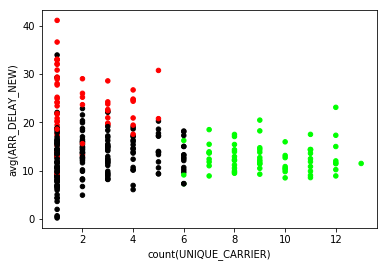

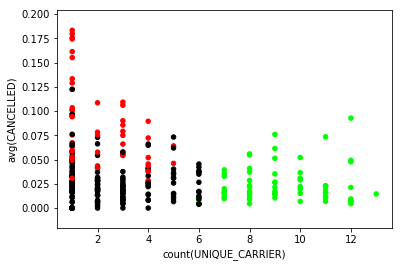

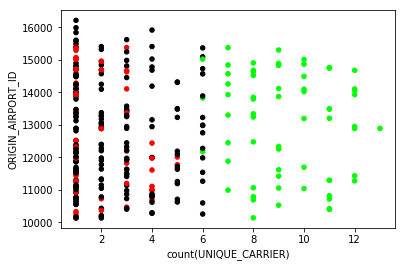

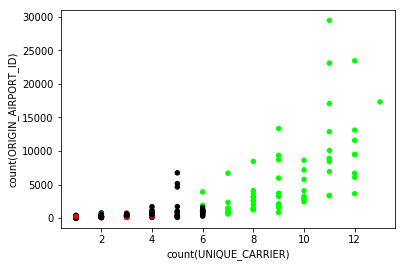

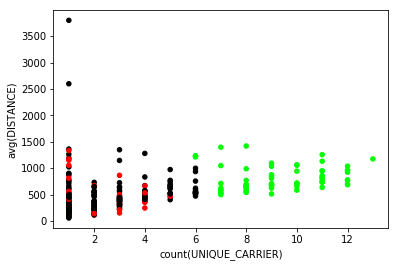

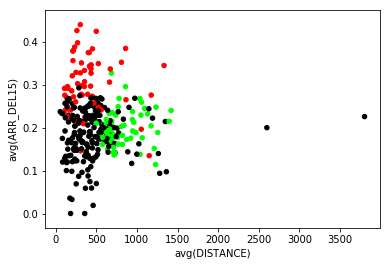

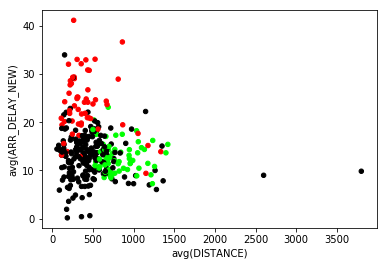

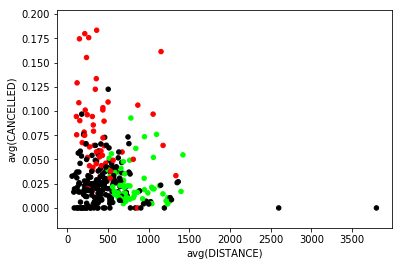

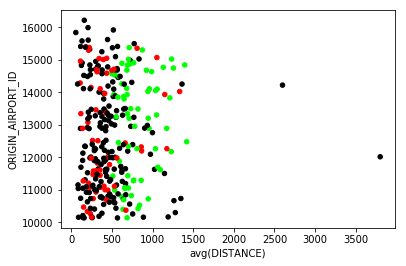

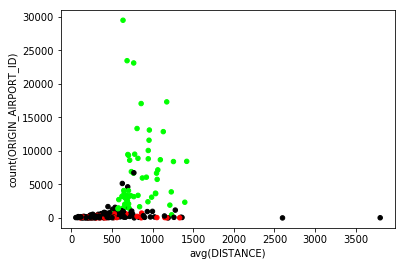

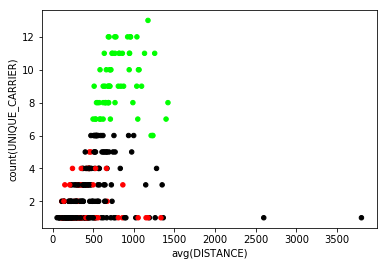

In [37]:
#Plot Scatter plot

import numpy as np
%matplotlib inline

colormap = np.array(['red', 'lime', 'black'])
columns = set(train_cluster_pd.columns.values) - set(['origin_airport_id','prediction'])
for feature1 in columns:
    for feature2 in columns:
        if feature1 != feature2:
            train_cluster_pd.plot(kind='scatter', x=feature1, y=feature2, c=colormap[train_cluster_pd.prediction])

In [38]:
end_time = time()
used_time = end_time - start_time
print("used time : " + str(used_time) + " seconds")
print("used time : " + str(used_time / 60) + " minutes")

used time : 660.581084013 seconds
used time : 11.0096847335 minutes
